# Perceptron

In [1]:
%matplotlib inline
from pylab import *

#### Init the dataset
First we initialize the dataset:


In [2]:
#### download the dataset 
# get the script from internet
! wget https://raw.githubusercontent.com/sorki/python-mnist/master/get_data.sh > /dev/null 2>&1  
# run it to dovnload all files in a local dir named 'data'
! bash get_data.sh >/dev/null 2>&1
# we do not need the script anymore, remove it
! rm get_data.sh* > /dev/null 2>&1

# initialize the dataset variables

%run utils

In [3]:
# set the number of patterns 
n_patterns = 40

# take 'n_patterns' rows
patterns = array(mndata.train_images)[:n_patterns]
# we rescale all patterns between 0 and 1
patterns = sign(patterns/255.0)
labels = array(mndata.train_labels)[:n_patterns]

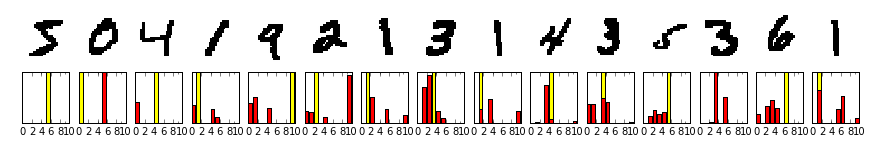

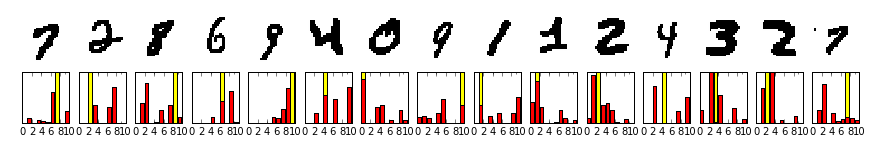

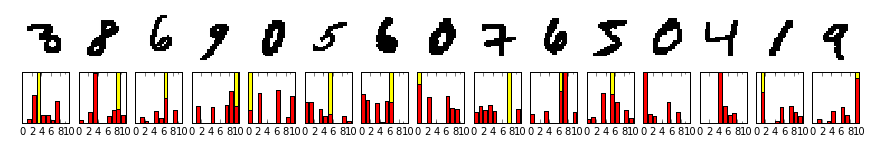

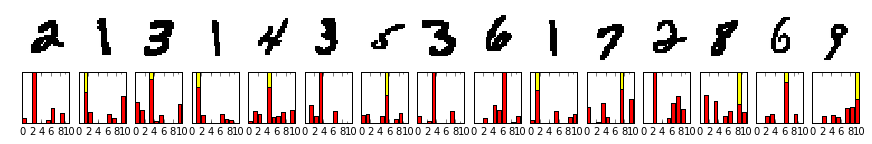

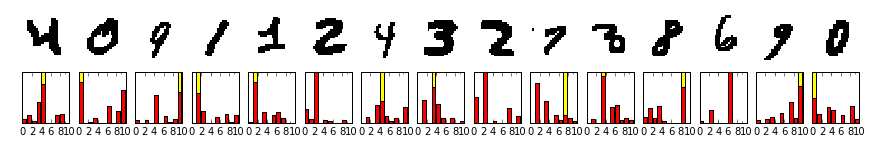

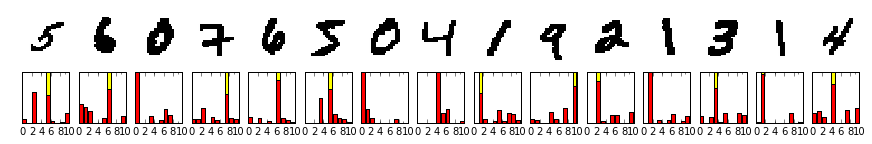

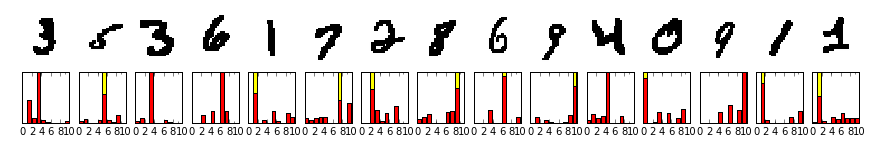

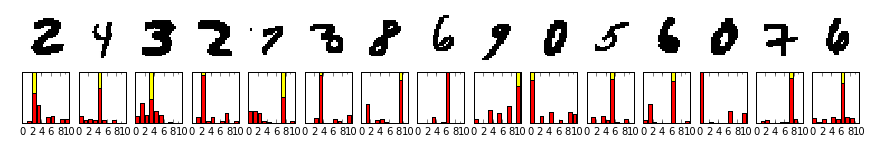

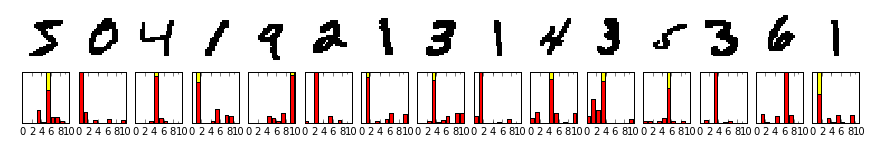

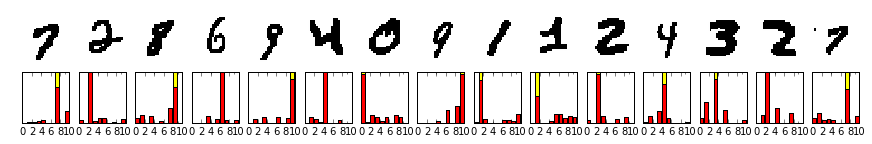

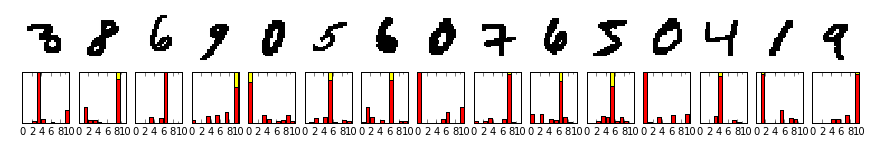

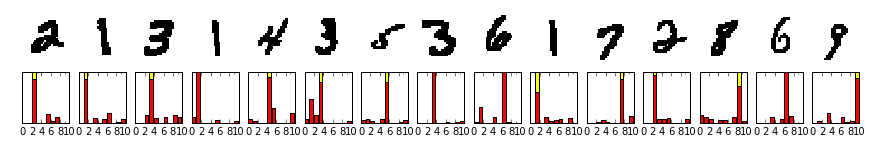

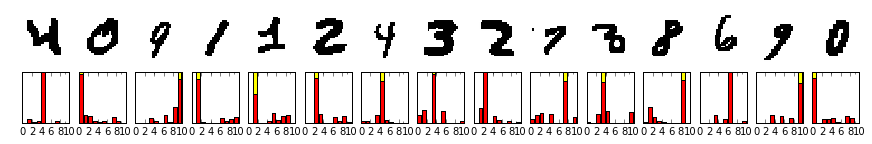

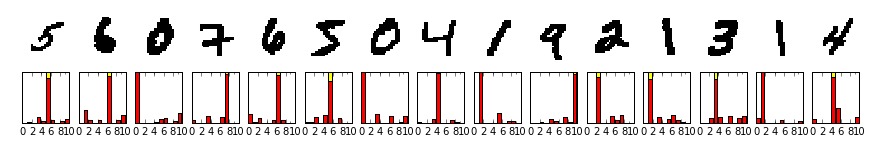

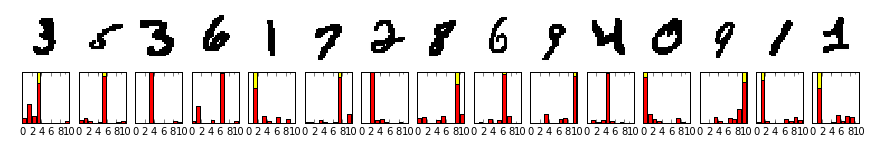

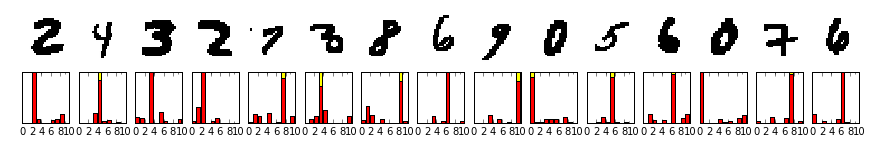

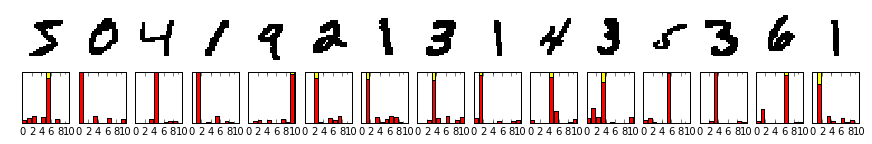

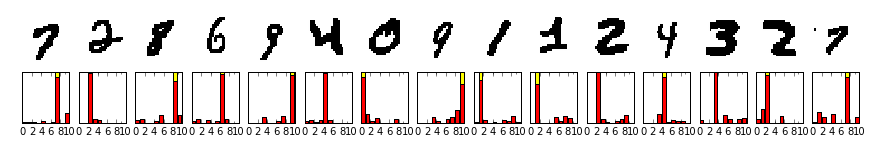

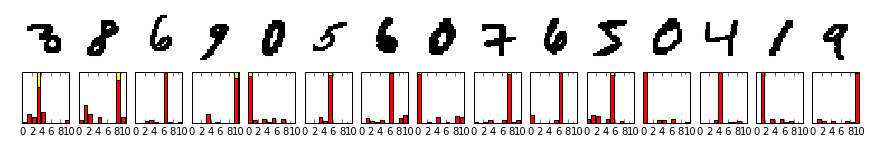

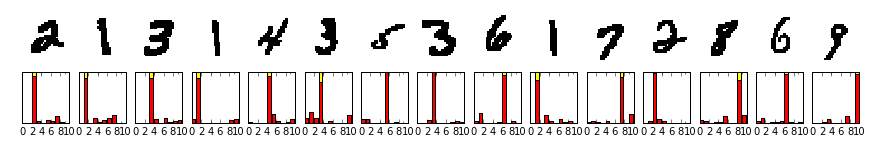

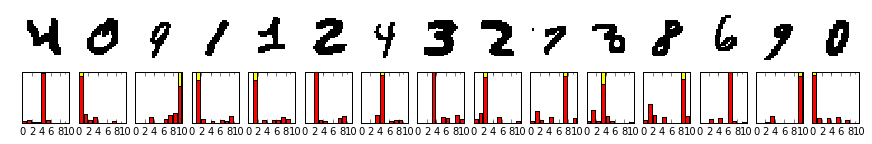

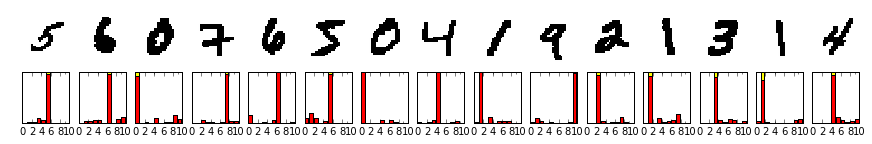

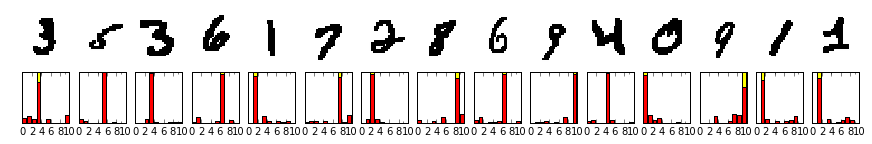

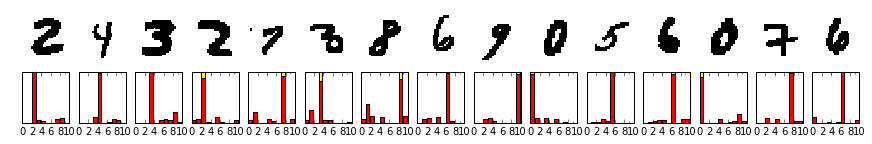

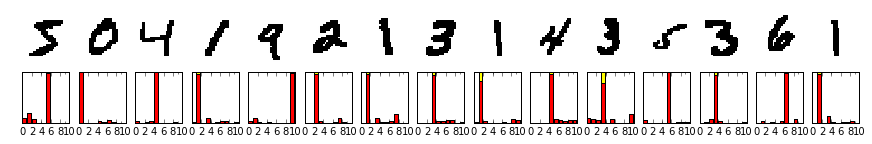

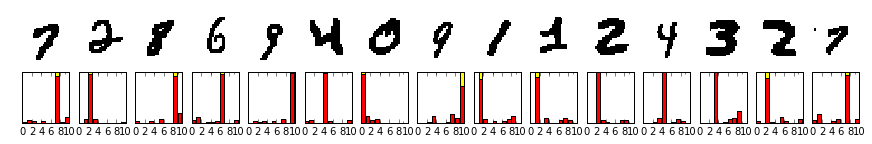

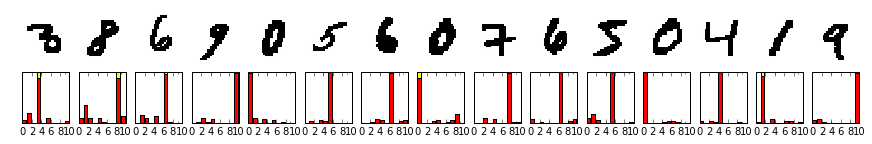

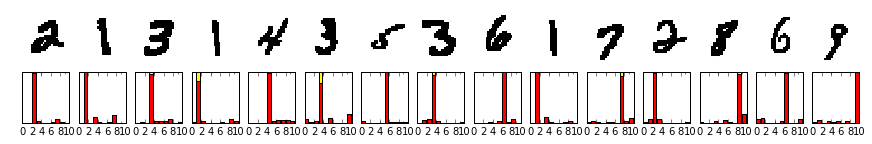

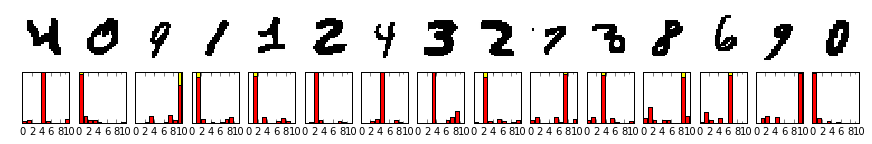

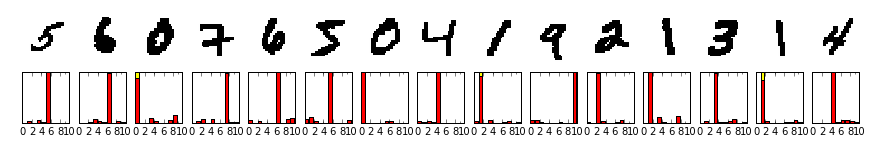

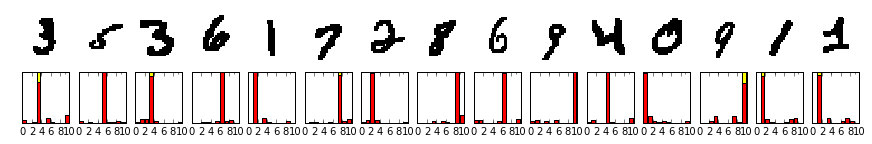

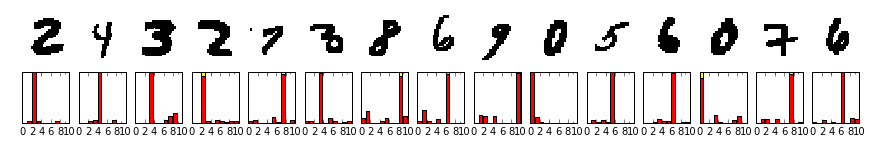

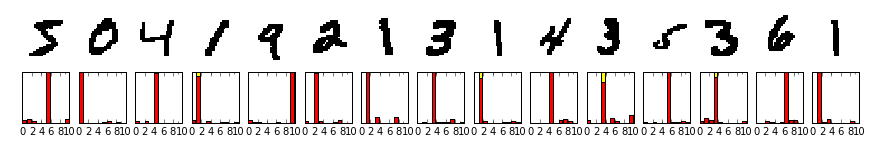

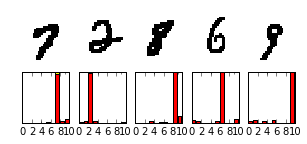

In [4]:
trials = 500
eta = 0.01
m = 10
w = zeros([m, n+1])
x = zeros(n)
y_target = zeros(m)
y = zeros(m)

windows = 15

for t in xrange(trials) :
    pattern_index = t%n_patterns
    x = hstack([ 1, patterns[pattern_index] ])
    y_target *= 0
    y_target[labels[pattern_index]] = 1
    
    y = dot(w,x) 
    w += eta*outer(y_target - y, x);
    

    win_count = t%windows

    if win_count == 0:
        fig = figure(figsize = (15, 2))
    
    ax1 = fig.add_subplot(2,windows,win_count + 1)
    ax1.imshow(to_mat(x[1:]), interpolation = 'none', 
               aspect = 'auto', cmap = cm.binary )
    ax1.set_axis_off()
    ax2 = fig.add_subplot(2,windows,win_count+windows+1)
    ax2.bar(arange(m),y_target,color='yellow')
    ax2.bar(arange(m),y,color='red')
    ax2.set_yticks([]) 
    ax2.set_xticks([0,4,9],[0,4,9]) 
    ax2.axes.get_xaxis().set_visible('true')
    ylim([0,1])
    fig.canvas.draw()
 
    if win_count == windows - 1 :
        show()
    
    

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
The next cell is just for styling

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../style/ipybn.css", "r").read()
    return HTML(styles)
css_styling()